In [0]:
import numpy as np
import pandas as pd
import cmath
import math
import random

In [0]:
N = 64
z=[]
for i in range(N):
    z.append(random.uniform(0, 100))

In [0]:
#DCT

def dct(z,N):
  # x=[8,16,24,32,40,48,56,64]
  # print(x)
  # W=complex(math.cos(2*math.pi/2*N), -math.sin(2*math.pi/2*N))
  Z=[0]*(N)
  for k in range(N):
    for i in range(N):
      Z[k] = Z[k] + 2*z[i]*math.cos(math.pi*k*(2*i+1)/(2*N))
  print(Z)
  return Z

In [183]:
Z_dct=dct(z,N)
def idct(y,N):
  X=[0]*N
 # y = [576.0, -206.15433672656437, -4.263256414560601e-14, -21.550553628926068, 0.0, -6.428892919551728, -8.526512829121202e-14, -1.622474328308769]
  for n in range(N):
    for k in range(N):
      if(k == 0):
        X[n]=X[n] + (1/2)*y[k]*math.cos(math.pi * k * (2*n + 1)/ (2*N))
      else:
        X[n]=X[n]+ y[k]*math.cos(math.pi * k * (2*n + 1)/ (2*N))
    X[n] = (1/N) * X[n]
  return X


[7353.706059817953, 261.3567854927049, 179.23292662826316, 277.8551357894628, -243.19862265381835, 665.5719379222261, -276.00914393472135, -294.93142253406637, -142.98066876421228, -302.81340345641615, -295.6764084138435, 293.2084283162401, -61.37045653350547, -383.7686274288113, -2.0321545878401466, -373.1913792208492, -327.6671961194588, 348.57772043059276, -278.92561117349334, 173.25137163700023, -154.8547022489883, 421.43288701748753, -613.8006877959144, -164.22390462322107, 29.566296689384146, -509.9741347834795, -393.79974914480704, -152.00495894292612, 41.542372732048904, 16.055409085886687, 181.59661272101908, -178.92623637909668, -183.94110055363817, -264.11217533934996, -5.999484198446453, -58.012404137547925, -310.41000852660767, -258.52566051321884, -488.05620219451936, 313.4126946492854, 895.3640103742206, -102.67627708980805, -272.28131855061514, -414.1509873921459, -31.056909204343388, -260.57535175804964, -346.57486293546566, -172.28567434308934, -133.90262947254905, -8

In [0]:
def modified(Z_dct,N):
  L=[i for i in range(64)]
  x = []
  for l in L:
    Xm=[0]*N
    for k in range(N-l):
      Xm[k]=Z_dct[k]
    x.append(Xm)
  return x

In [0]:
c=modified(Z_dct,64)
c_out = []
for j in range(64):
  c_out.append(idct(c[j],64))

In [0]:
e1 = []
for i in range (64):
  e1.append((np.sum(abs(np.array(z)-np.array(c_out[i]))**2)) / 64)
  

In [0]:
#DFT

def dft(x,N):
  W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
  W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
  for i in range(N):
    for j in range(N):
      W_matrix[i][j] = (W**(i*j))
  x = np.matrix(x)
  return np.array(W_matrix.dot(x.T))[:,0]

In [0]:
Z_dft= dft(z,N)

In [0]:
def idft(x,N):
  W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
  W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
  for i in range(N):
    for j in range(N):
      W_matrix[i][j] = 1/(W**(i*j))
  x = np.matrix(x)
  return (1/N)*np.array(W_matrix.dot(x.T))[:,0]

In [0]:
def modified(Z_dft,N):
  L=[i for i in range(64)]
  x = []
  for l in L:
    Xm=[0]*N
    for k in range(int((N-l-1)/2)+1):
      Xm[k]=Z_dft[k]
    for k in range(int((N+l+1)/2)+1,N):
      Xm[k]=Z_dft[k]
    x.append(Xm)
  return x

In [0]:
c1=modified(Z_dft,64)
c_out1 = []
for j in range(64):
  c_out1.append(idft(c1[j],64))

In [0]:
e2 = []
for i in range (64):
  e2.append((np.sum(abs(np.array(z)-np.array(c_out1[i]))**2)) / 64)

In [0]:
#HAAR

h2 = np.array([[1,1],[1,-1]])/math.sqrt(2)
def haar_mat(n):
  n = int(n)
  if n == 1:
    return h2
  else:
    a = np.kron(haar_mat(n-1),[1,1])
    b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
    #print(np.concatenate((a,b),axis=0))
    return np.concatenate((a,b),axis=0)/math.sqrt(2)
def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

In [0]:
def inverse_haar(y):
  n = int(math.log(len(y),2))
  N = len(y)
  hn = haar_mat(n)
  return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [0]:
def modified_haar(x, N):
  L=[i for i in range(64)]
  x_mod = []
  for l in L:
    y = [0]*N
    for i in range(N-l):
      y[i] = x[i]
    x_mod.append(y)
  return x_mod


In [0]:
x = np.array(z)
z_haar = haar(x)
mod_haar = modified_haar(z_haar,N)
mod_ihaar = []
for j in range(N):
  mod_ihaar.append(inverse_haar(mod_haar[j]))

In [0]:
e_haar = []
for i in range(N):
  e_haar.append((np.sum(abs(x-np.array(mod_ihaar[i]))**2)) / N)

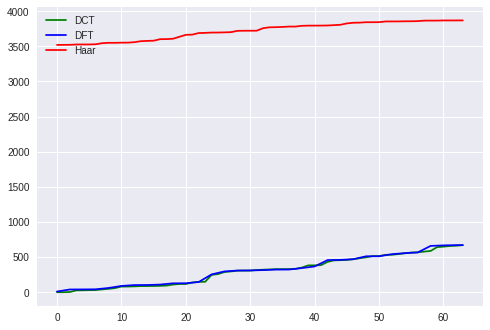

In [200]:
import matplotlib.pyplot as plt
plt.plot(e1,'g',label = "DCT")
plt.plot(e2,'b',label = "DFT")
plt.plot(e_haar,'r',label = "Haar")
plt.legend(loc='upper left')  
plt.show()